# **Project Title: Car Price Prediction**
# **Project Members:**
 # **1) Jinsar Ahmed (20SW116) G.L**
 # **2) Abdul Rafay  (20SW064)**
 # **3) M.Taha       (20SW102)**

# **Models used:**
# 1) Linear Regression
# 2) Polynomial Regression
# 3) Decision Tree Regression
# 4) Random Forest

# **Dataset folder includes dataset of almost 10 car brands, we can analyze and predict the price of any company/brand based on the dataset:**


## Introduction
In this project we are going to analyse, visualize and predict using Mercedes data set and using some methods like linear regression, polynominal regression etc.


### Importing Necessary Libraries
### Data Preparartion, Load and Understand Data
### Variable Description
### Data Analysis and Visualization
### Removing Outliers
### Machine Learning (Regression)
    * Linear Regression
    * Polynomial Regression
    * Support Vector Regression (SVR)
    * Decision Tree
    * Random Forest
### Model Selection
### Conclusion



# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.metrics import r2_score


# merging datasets
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/merc.csv
/content/.config/default_configs.db
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/logs/2023.10.12/13.25.36.773088.log
/content/.config/logs/2023.10.12/13.25.35.872929.log
/content/.config/logs/2023.10.12/13.25.22.709674.log
/content/.config/logs/2023.10.12/13.24.23.720152.log
/content/.config/logs/2023.10.12/13.24.55.075099.log
/content/.config/logs/2023.10.12/13.25.07.457568.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv


<a id = '1'></a><br>
# Data Preparation
## Load and Understand Data

In [ ]:
data = pd.read_csv('/content/merc.csv')

print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 13119 rows and 9 columns


In [ ]:
data.head(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
6,GLE Class,2018,30948,Automatic,16000,Diesel,145,47.9,2.1


In [ ]:
data.tail(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13112,C Class,2019,30399,Automatic,5000,Diesel,145,61.4,2.0
13113,C Class,2020,30999,Automatic,1000,Diesel,145,64.2,2.0
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0
13118,S Class,2019,54999,Automatic,2075,Diesel,145,52.3,2.9


In [ ]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

Check the data type of the columns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


## Variable/Column Description

In [ ]:
data.head(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
6,GLE Class,2018,30948,Automatic,16000,Diesel,145,47.9,2.1


* model : Model of car
* year : The year that car made
* price : Price (Sterlin)
* Transmission : Type of gear
* milage : How many miles the car went (1 mil = 1,609344 km)
* fuelType : Fuel type
* tax : tax
* mpg : Miles per gallon (1 galon = 3,78541178 liters)
* engine size : Size of engine (liters)

### Price will be our target column becouse we want to predict that and the other columns will be our tools that predict the price. However will we use all columns ?

# **Cleaning**

In [ ]:
# check for null values
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
data.duplicated().value_counts  # check for duplicate values

<bound method IndexOpsMixin.value_counts of 0        False
1        False
2        False
3        False
4        False
         ...  
13114    False
13115    False
13116    False
13117    False
13118    False
Length: 13119, dtype: bool>

In [ ]:
data.nunique()

model             27
year              25
price           4424
transmission       4
mileage         9716
fuelType           4
tax               40
mpg              120
engineSize        26
dtype: int64

Understand the dataset!


In [ ]:
print ("Rows     : " , data.shape[0])
print ("Columns  : " , data.shape[1])
print ("#"*40,"\n","Features : \n\n", data.columns.tolist())
print ("#"*40,"\nMissing values :\n\n", data.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(data.isna().sum() / data.isna().count() * 100, 2).sort_values(ascending=False)) # looking at columns with most Missing Values

Rows     :  13119
Columns  :  9
######################################## 
 Features : 

 ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
######################################## 
Missing values :

 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
######################################## 
Percent of missing :

 model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64


## As there are no any duplicated and null values we can move forward to the next step

# Observations

* There are no missing values.
* price is the Target Variable.
* model, transmission, fuelType are categorical variables while others are numerical value.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


## Observations

Minimum Manufacturing year of the car is **1970** and Maximum year is **2020** with mean of **2017**.

Mean Price of the cars is **24698 Pounds** to max of **159999 Pounds**.

Average Mileage of the cars is **21949 mile**s with maximum of **259000 miles**.

Average Engine Size is **2.07 L** with maximum of **6.2 L**.

Average Tax is **129** with a maximum of **580**.

# **Correlation between Columns**

In [ ]:
data.corr() #corrolation between columns

<ipython-input-159-5de932266b61>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() #corrolation between columns


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


<a id = '3'></a><br>
## Correlation Map


<ipython-input-160-3b292d994a6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


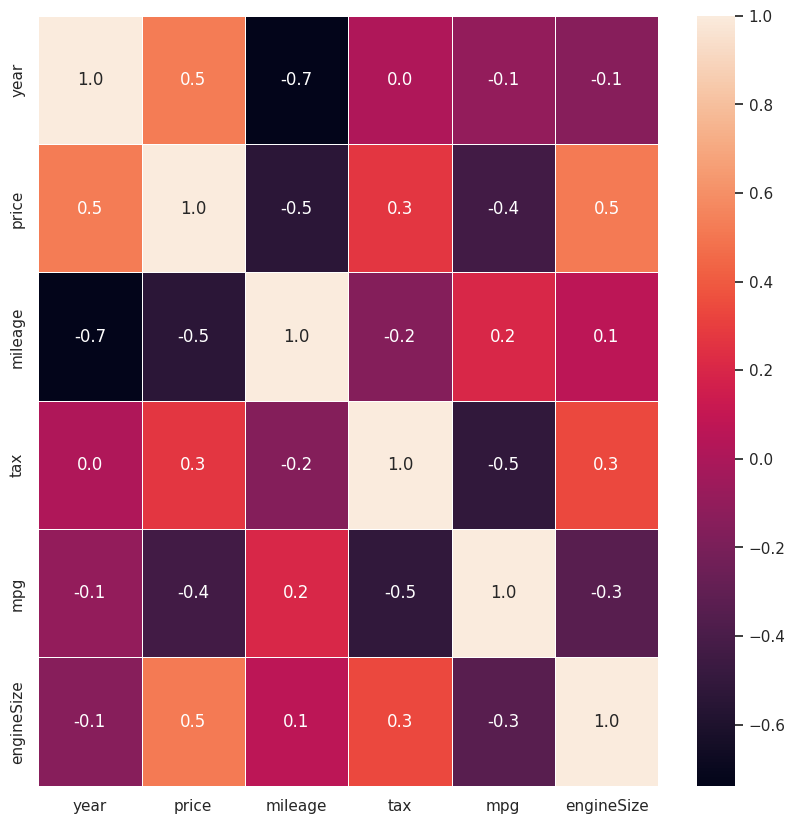

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Here is corrolation map. If the value near to -1 that means there is negative corrolation between values.

For example : milage and year. Naturally, the milage is increases as the car is driven. Similarly if the value near to 1 that means there is positive corrolation between values.

In [ ]:
data.corr()["price"].sort_values()


<ipython-input-161-7453993b4955>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

## **Price is our target variable!**

# **Data Analysis and Visualization**
* Univariate Analysis


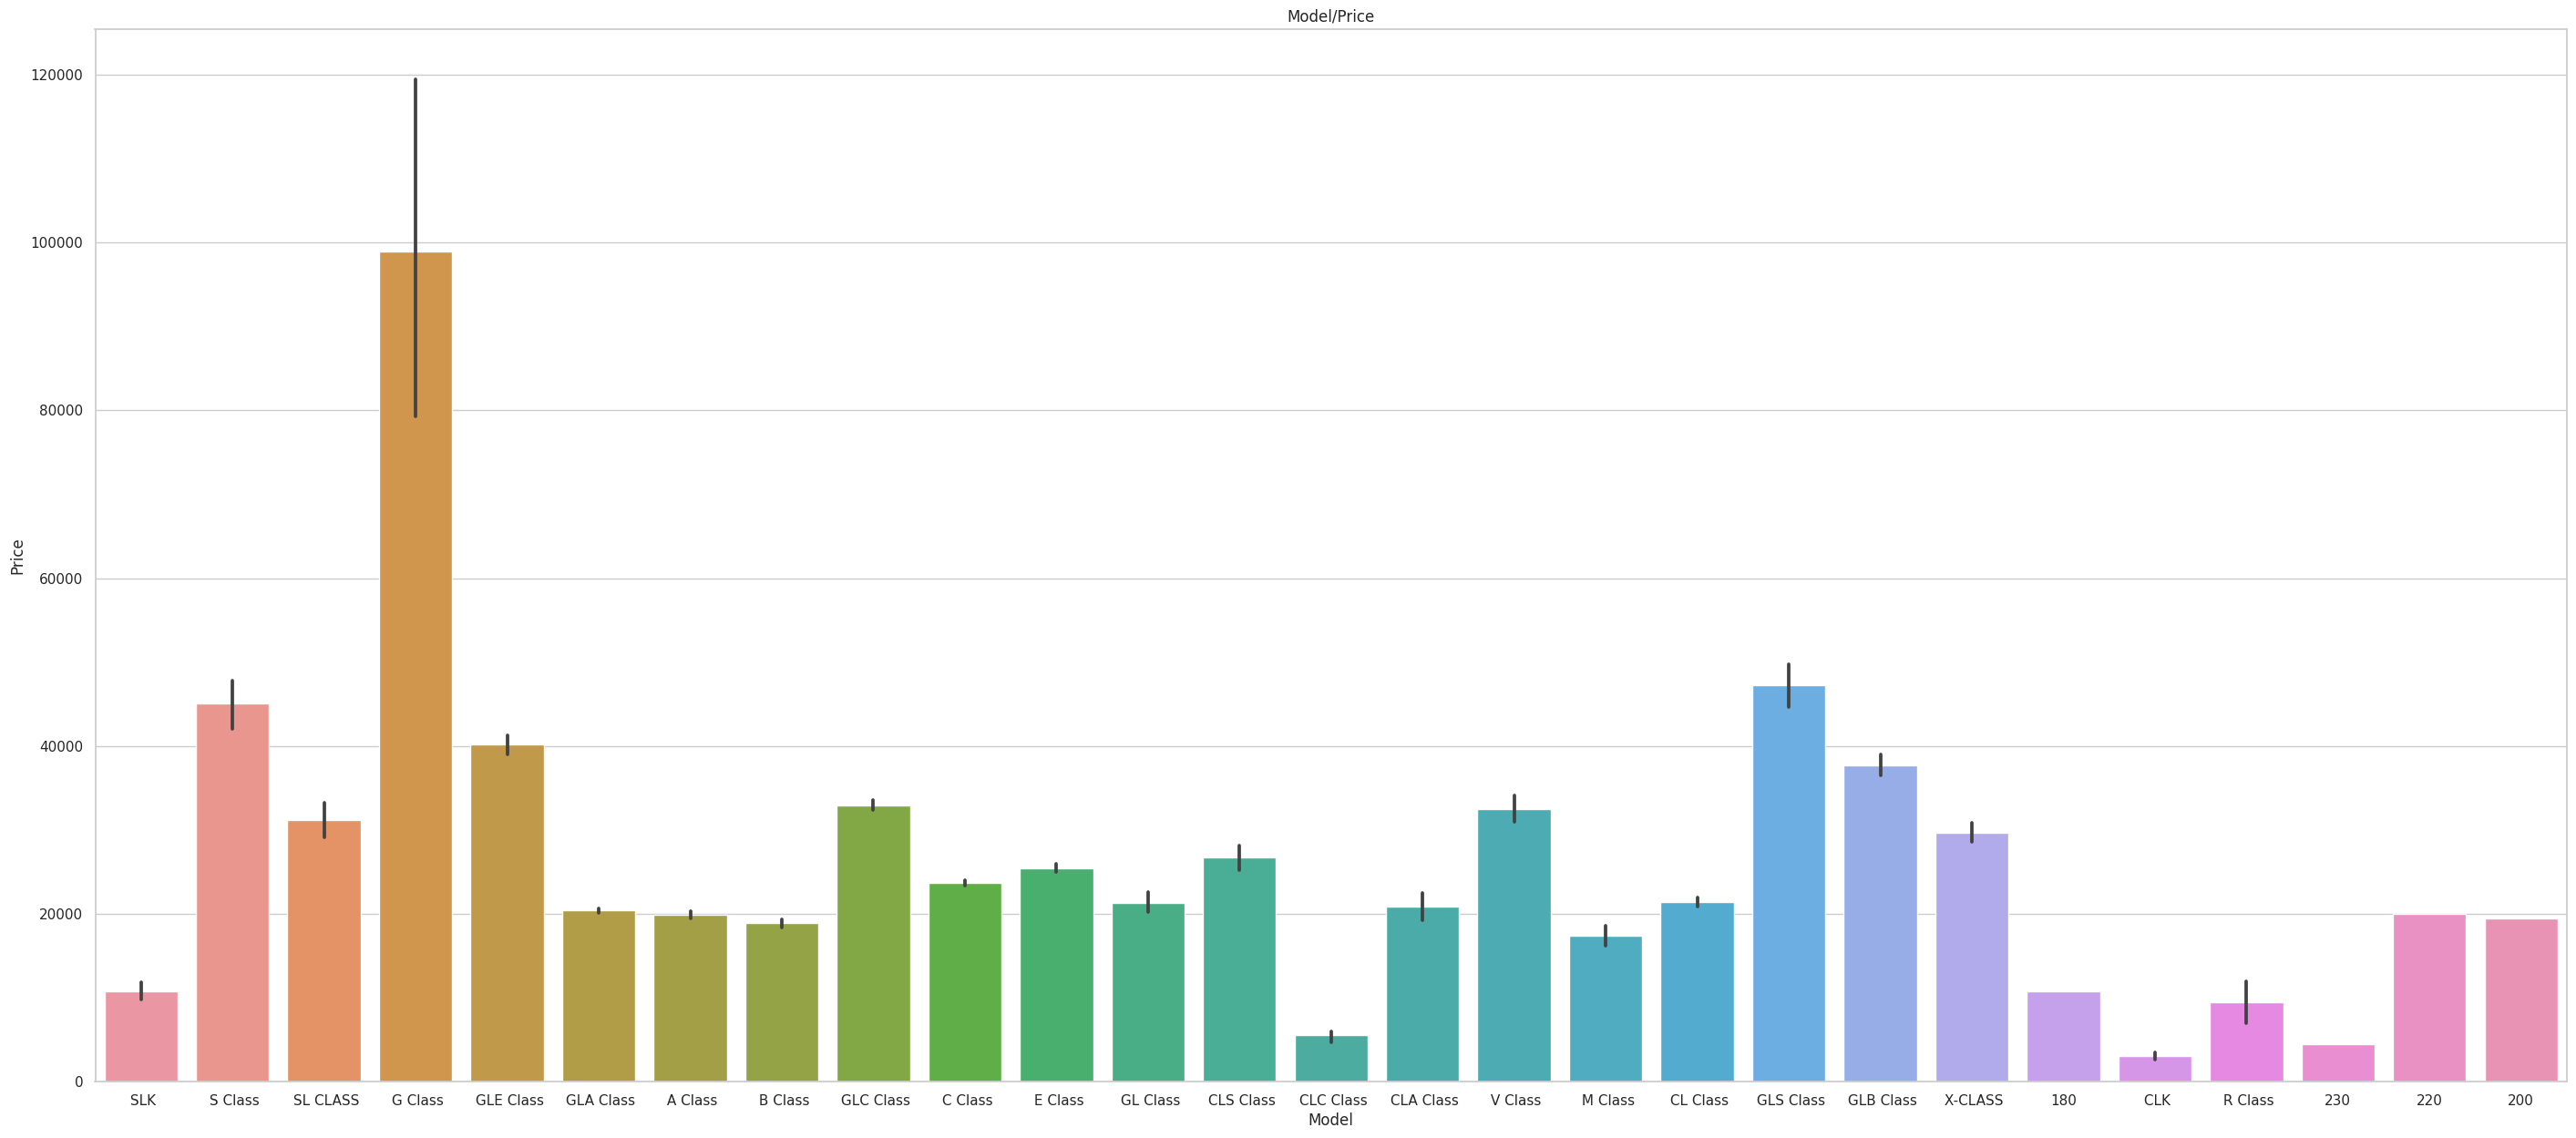

In [ ]:
data_model = data.model
data_price = data.price

plt.figure(figsize=(35,15))
sns.barplot(x = data_model, y = data_price)

plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Model/Price')
plt.show()

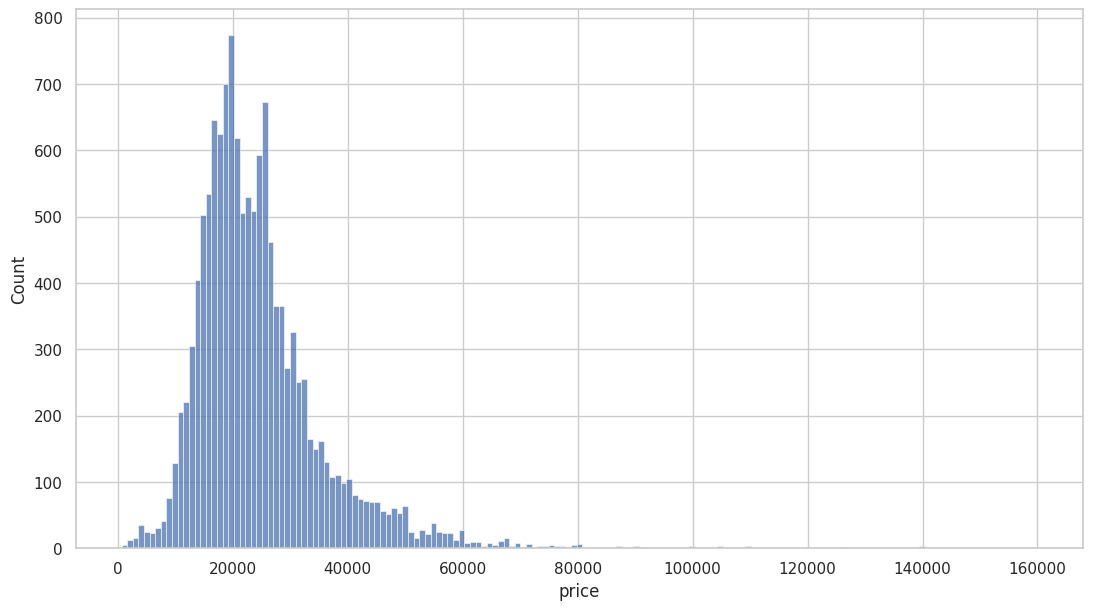

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(data["price"])
plt.show()

# As you see, after 75000 there are unnecessary number of values considered. They would destroy our predictions.

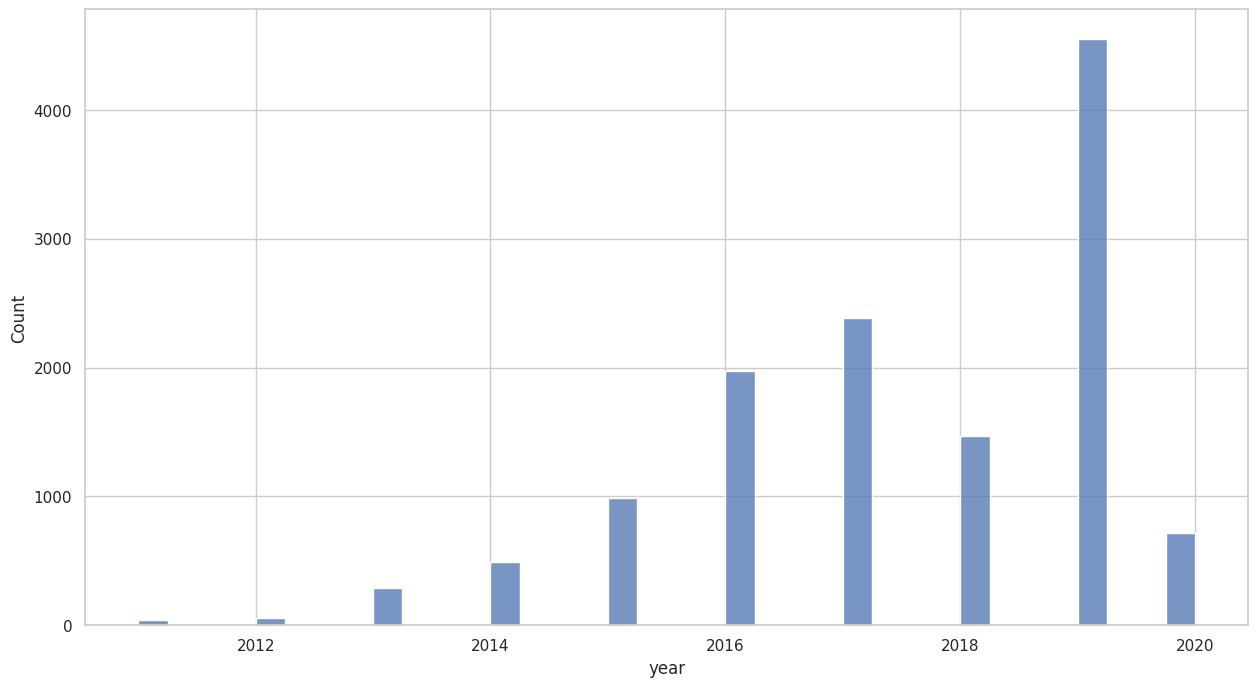

In [ ]:
# sns.set(rc = {'figure.figsize':(15,8)})
plt.figure(figsize=(15,8))
sns.histplot(data.year[data.year > 2010])
plt.show()


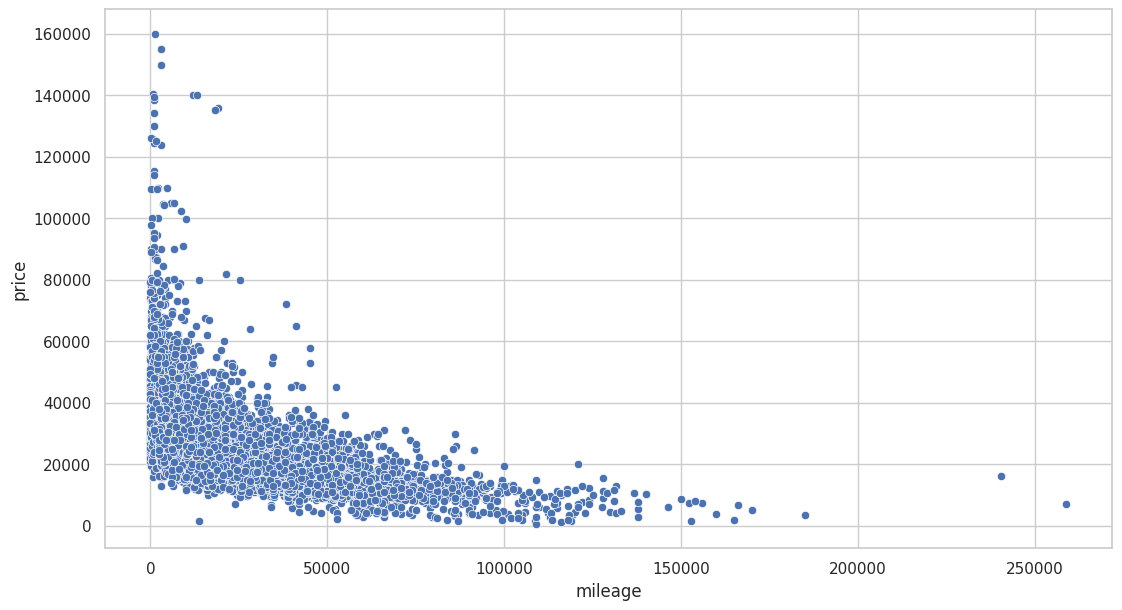

In [ ]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=data.mileage, y=data.price, data=data)
plt.show()

## **Univariate Analysis**

 ## Function plots a combined graph for univariate analysis of continous variable to check spread, central tendency , dispersion and outliers

In [ ]:
def dist_box(data):

 # function plots a combined graph for univariate analysis of continous variable
 #to check spread, central tendency , dispersion and outliers

    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]

    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="teal",ax=ax_box)
    ax_box.set(xlabel='')

     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='purple',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

<ipython-input-166-d60ece4fc429>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False,color='purple',ax=ax_dis)
<ipython-input-166-d60ece4fc429>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False,color='purple',ax=ax_dis)
<ipython-input-166-d60ece4fc429>:20: UserWarning

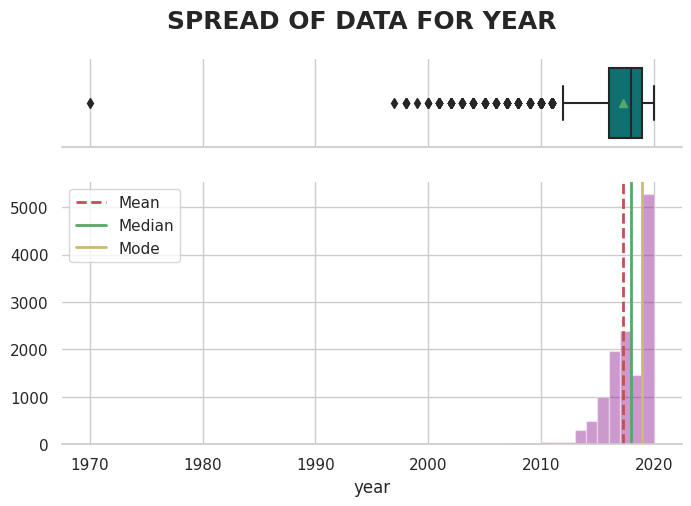

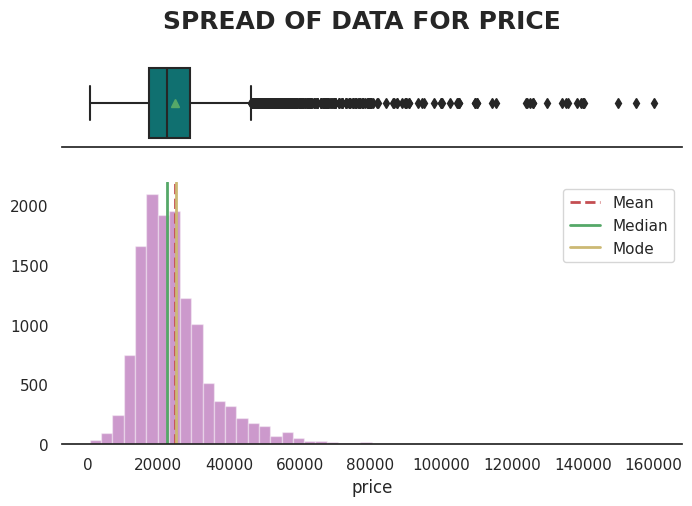

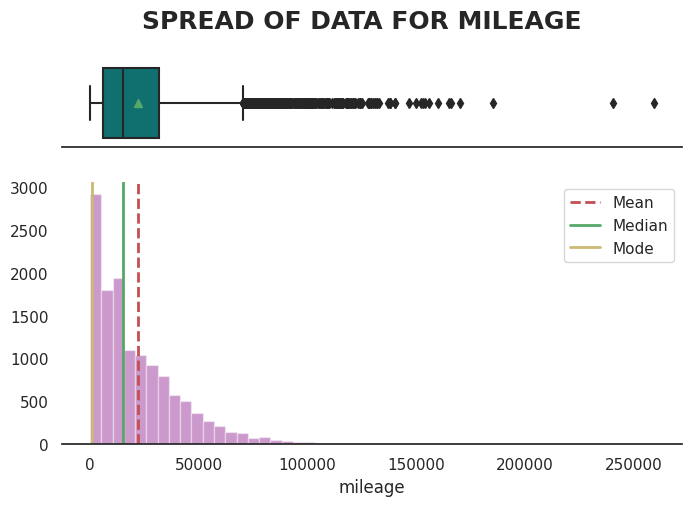

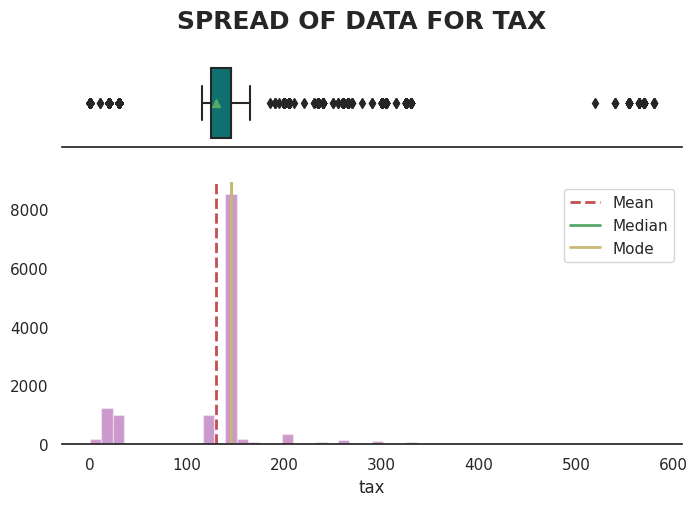

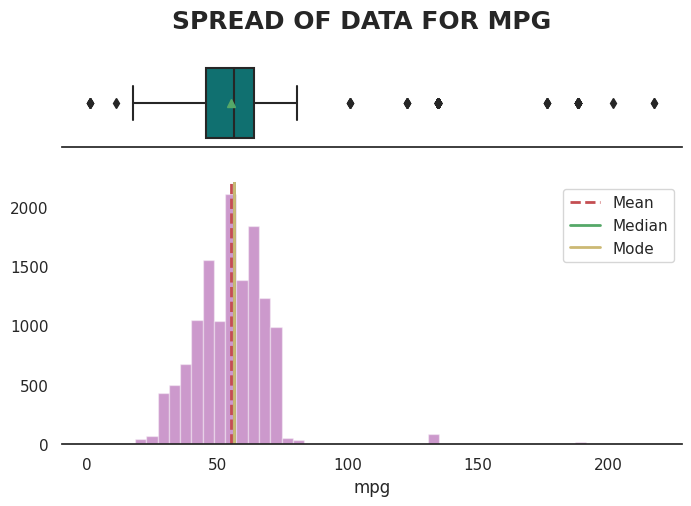

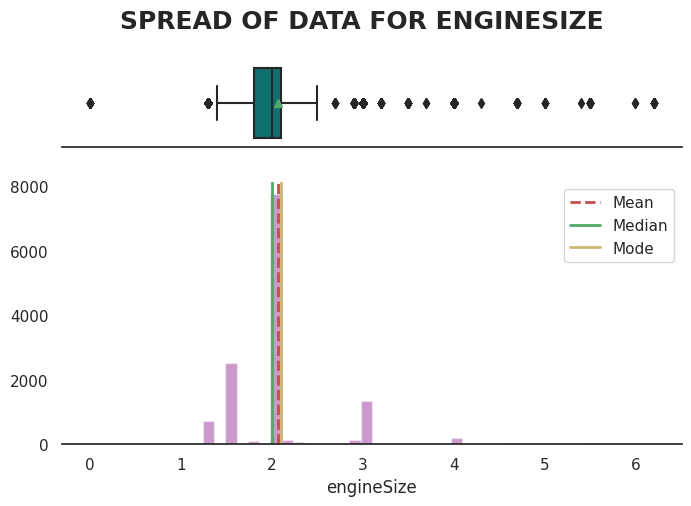

In [ ]:
#select all quantitative columns for checking the spread
list_col=  data.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(data[list_col[i]])

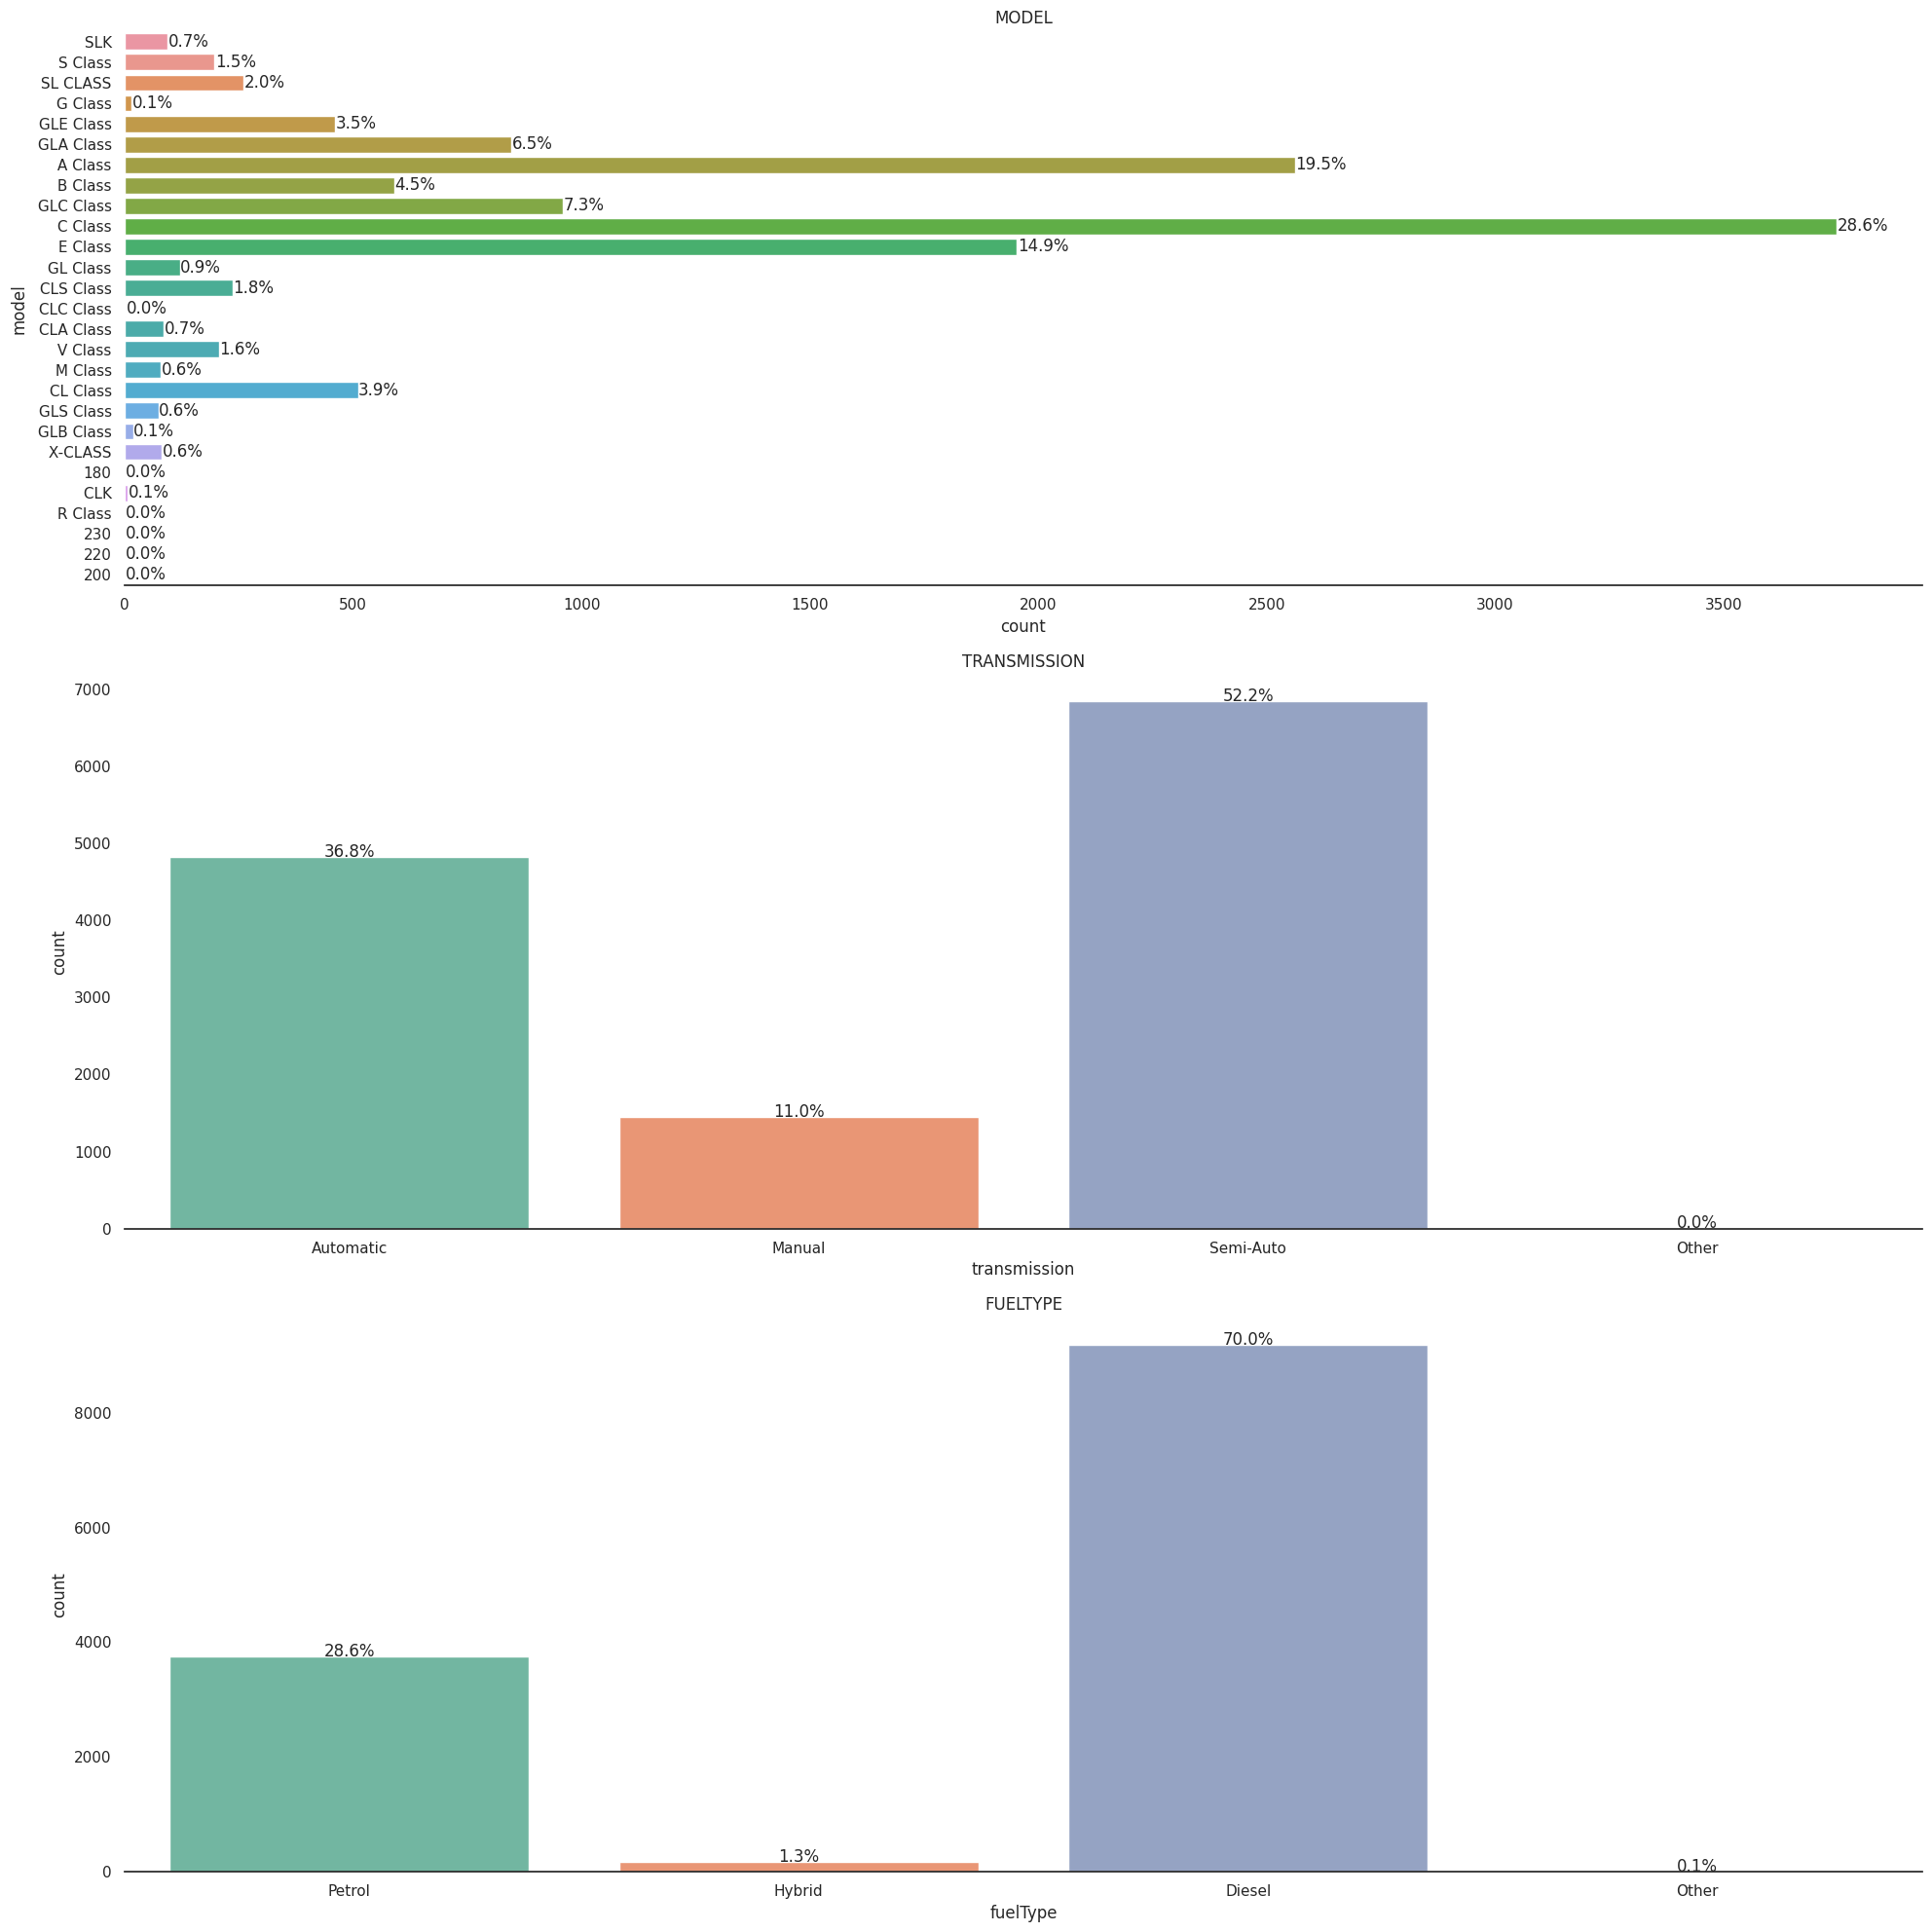

In [ ]:
plt.figure(figsize=(20, 20))
sns.set_theme(style="white")
cols = ['model', 'transmission', 'fuelType']

for i, variable in enumerate(cols):
    plt.subplot(3, 1, i + 1)  # 3 rows, 1 column
    order = data[variable].value_counts(ascending=False).index
    sns.set_palette('Set2')

    if variable == 'model':
        ax = sns.countplot(data=data, y=data[variable], orient='h')
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width() / len(data[variable]))
            x = p.get_width() + 1
            y = p.get_y() + p.get_height() / 2
            plt.annotate(percentage, (x, y), va='center')
    else:
        ax = sns.countplot(data=data, x=data[variable], orient='v')
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / len(data[variable]))
            x = p.get_x() + p.get_width() / 2
            y = p.get_height() + 1
            plt.annotate(percentage, (x, y), ha='center')

    sns.despine(top=True, right=True, left=True)
    plt.tight_layout()
    plt.title(cols[i].upper())

plt.show()


## **Observations**

~ 78 % cars use petrol, 28 % use Diesel and 1.8 % are Hybrid.

~ 36 % cars are Automatic.

~ 11 % cars are Manual.

~ 52 % cars are Semi-Auto.


~ Most of the EngineSize belongs to 2.0 Litres


~ 28 % of the cars in the dataset are C Class
~ 19 %  A Class and 14% E Class.

~ Most of the Car prices are between 10,000 Pounds to 30,000 Pounds


In [ ]:
data.sort_values('price', ascending=True).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11816,A Class,2003,650,Manual,109090,Petrol,235,40.0,1.4
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11174,S Class,2001,1695,Automatic,108800,Diesel,325,31.7,3.2
12710,C Class,2006,1695,Automatic,153000,Petrol,300,33.6,1.8
12766,C Class,2004,1780,Automatic,118000,Diesel,265,41.5,2.2
12009,A Class,2007,1800,Automatic,84000,Petrol,200,42.8,1.5
11764,SLK,1998,1990,Automatic,99300,Petrol,265,32.1,2.3


In [ ]:
len(data)

13119

In [ ]:
len(data) * 0.01

131.19

# Removing Outliers
# We remove 1 percent of the data set (the part that is most likely the outlier that distorts the data) and we get a 99 percent data set.



# * nnpDf = ninety nine percent data frame

In [ ]:
nnpDf = data.sort_values("price",ascending = False).iloc[131:]
nnpDf

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6177,GLS Class,2019,65990,Semi-Auto,5076,Diesel,150,30.4,3.0
5779,C Class,2020,65990,Semi-Auto,999,Petrol,145,28.0,4.0
3191,C Class,2020,65980,Semi-Auto,3999,Petrol,145,28.0,4.0
4727,C Class,2019,65000,Semi-Auto,3398,Petrol,145,27.2,4.0
8814,S Class,2019,64999,Semi-Auto,119,Petrol,145,40.9,3.0
...,...,...,...,...,...,...,...,...,...
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0


In [ ]:
nnpDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


# As you see, after discarding 1% dataset there are not massive changes and it is distributed and more balanced. So we are good to go.

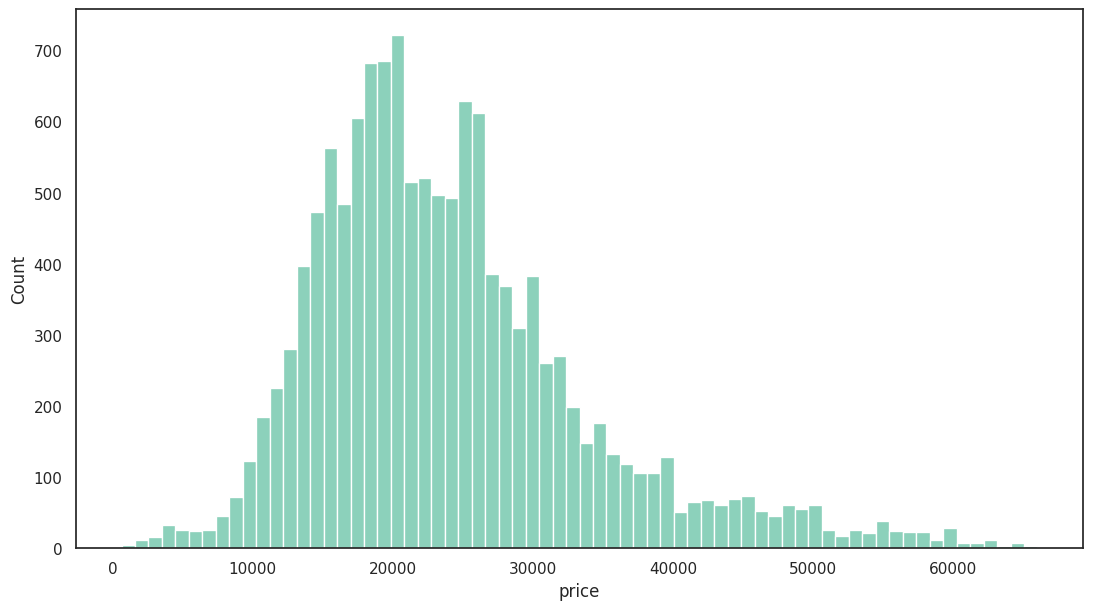

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(nnpDf["price"])
plt.show()

# Lets have a look at that the value year which is corrolated with price

In [ ]:
nnpDf.groupby('year')['price'].mean()


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

# In year 1970, mean of price is too high by comparing to year order. Also this would spoil our model.

In [ ]:
nnpDf[nnpDf.year != 1970].groupby("year")["price"].mean()


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

# Better now !

In [ ]:
nnpDf.drop('transmission', axis=1, inplace=True)

In [ ]:
nnpDf.drop('fuelType', axis=1, inplace=True)

In [ ]:
nnpDf.drop('model', axis=1,inplace=True)

I droped the string values. nnpDf is looking weird  isn't it ?

In [ ]:
df = nnpDf

In [ ]:
df.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


PairPlot of the whole dataframe (for comparison)

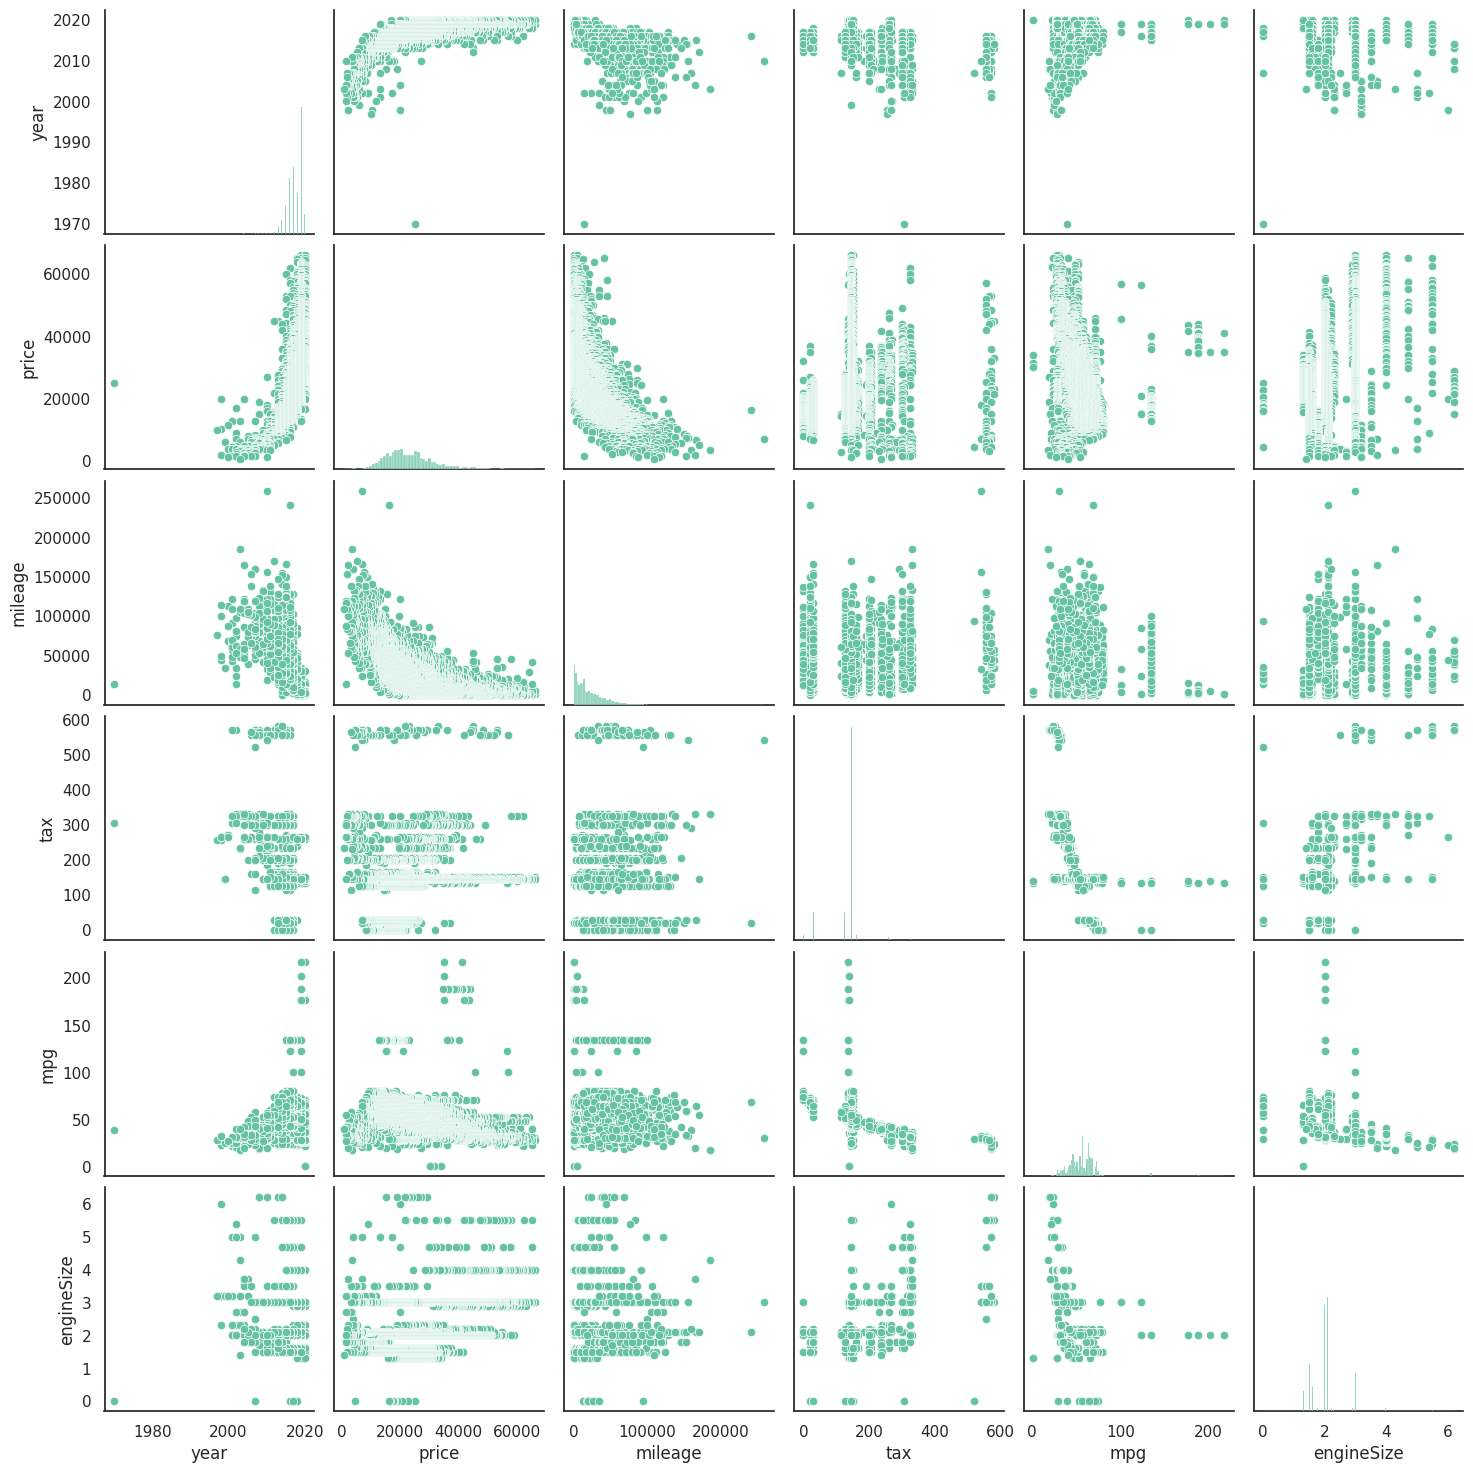

In [ ]:
sns.pairplot(df)
plt.show()

<a id = '4'></a><br>
# **Machine Learning**

# Splitting the data into Train and Test sets.

In [ ]:
x = df.drop('price', axis=1).values #train
y = df['price'].values #test #target variable


In [ ]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [ ]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 0)

# Trying All 4 Regression Models for their Accuracy

<a id = '5'></a><br>
### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
y_pred_lin_reg = linear_regression.predict(x_test)

In [ ]:
print(f'y_test: {y_test}\nprediction: {y_pred_lin_reg}')

y_test: [19749 12498 21449 ... 10495 16990 47599]
prediction: [24873.57575117 16481.40628173 21583.82921835 ...  7238.85714077
 21349.44356384 37354.78023641]


In [ ]:
print('R Square Score for Linear Regression : ', r2_score(y_test, y_pred_lin_reg))

R Square Score for Linear Regression :  0.7235429682066148


<a id = '6'></a><br>
### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x,y)
linear_regression2 = LinearRegression()
linear_regression2.fit(x_poly, y)
y_pred_poly_reg = linear_regression2.predict(x_poly)

In [ ]:
print(f'y: {y}\nprediction: {y_pred_poly_reg}')

y: [65990 65990 65980 ...  1490  1350   650]
prediction: [47687.24087223 62241.22088156 60865.02664246 ...  6536.43823961
  4293.95681763 -2031.40459247]


In [ ]:
print('R Square Score for Polynomial Regression : ', r2_score(y, y_pred_poly_reg))

R Square Score for Polynomial Regression :  0.8312792209895457


<a id = '8'></a><br>
### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=0)
decision_tree_reg.fit(x_train, y_train)
y_pred_dt_reg = decision_tree_reg.predict(x_test)

In [ ]:
print(f'y_test: {y_test}\nprediction: {y_pred_dt_reg}')

y_test: [19749 12498 21449 ... 10495 16990 47599]
prediction: [24549. 13991. 24124. ... 11599. 17990. 44980.]


In [ ]:
print('R Square Score for Decision Tree Regression : ', r2_score(y_test, y_pred_dt_reg))

R Square Score for Decision Tree Regression :  0.8514049939401422


<a id = '9'></a><br>
### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators = 50, random_state= 0 ) # n_estimators = number of estimator tree
random_forest_reg.fit(x_train, y_train)
y_pred_rf_reg = random_forest_reg.predict(x_test)

In [ ]:
print(f'y_test: {y_test}\nprediction: {y_pred_rf_reg}')

y_test: [19749 12498 21449 ... 10495 16990 47599]
prediction: [24350.   14691.38 21181.42 ... 10812.78 18399.36 46937.7 ]


In [ ]:
print('R Square Score for Random Forest Regression : ', r2_score(y_test, y_pred_rf_reg))

R Square Score for Random Forest Regression :  0.904159941724667


# Now lets compare all these 4 models by using bar graph

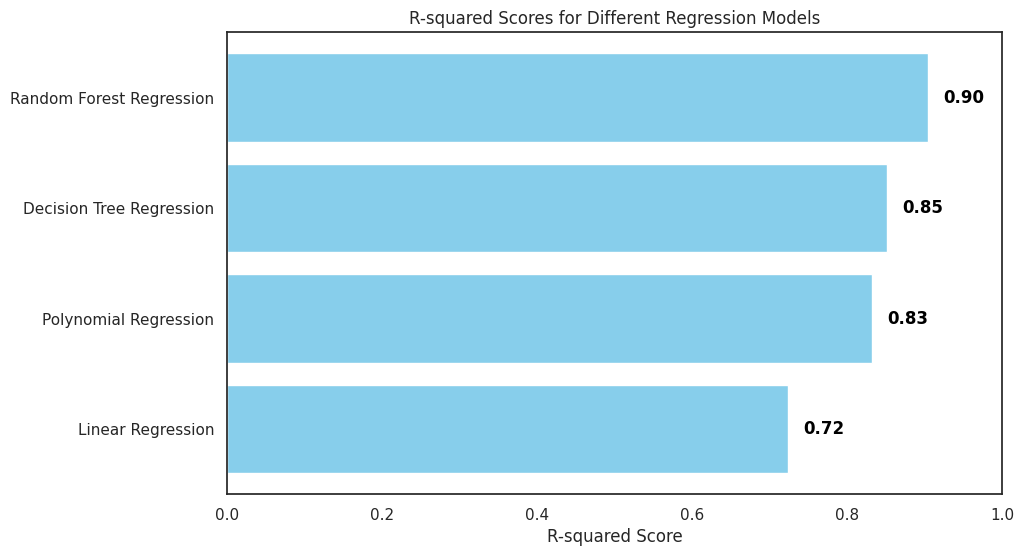

In [ ]:
models = ["Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression"]

r2_scores = [r2_score(y_test, y_pred_lin_reg), r2_score(y, y_pred_poly_reg), r2_score(y_test, y_pred_dt_reg), r2_score(y_test, y_pred_rf_reg)]


plt.figure(figsize=(10, 6))
plt.barh(models, r2_scores, color='skyBlue')
plt.xlabel('R-squared Score')
plt.title('R-squared Scores for Different Regression Models')
plt.xlim(0, 1)


for i, v in enumerate(r2_scores):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center', color='black', fontweight='bold')

plt.show()


## So, Random forest has the highest R Square Score and accuracy, so Random forest is the best Model

In [ ]:
df.head(20)

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
8083,2018,64999,41102,145,23.0,5.5
267,2019,64998,313,145,31.4,4.7
2956,2020,64980,3999,145,40.4,3.0
2274,2020,64980,3999,145,40.4,3.0
12160,2018,64950,13000,145,28.5,3.0


In [ ]:
print(random_forest_reg.predict([[2020, 1000, 140, 29.2, 4.0]]))

[60682.56]


In [ ]:
print(random_forest_reg.predict([[2000, 90000, 290, 30.4, 3.0]]))

[4986.56]


# **Pose at least three questions related to business or real-world applications of how the data could be used.**

How does the year of a Mercedes car affect its price, and has there been a noticeable trend over the years?

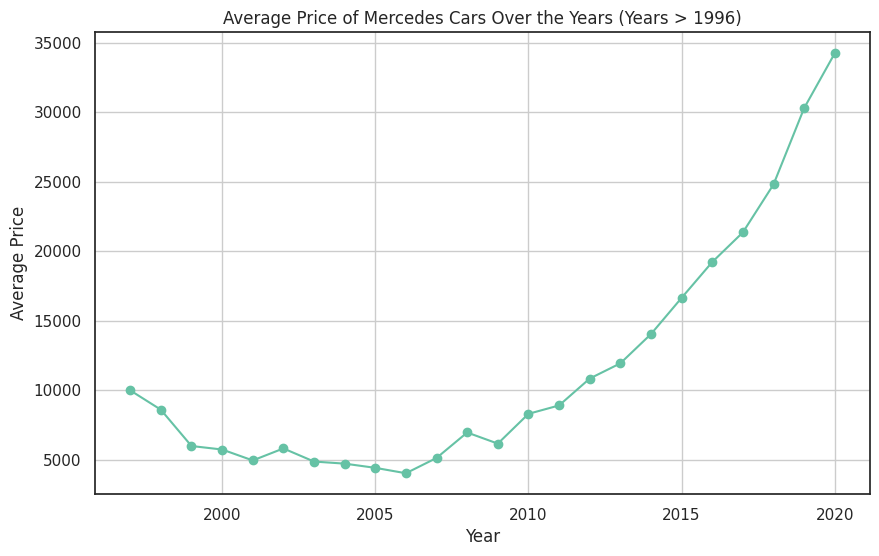

In [ ]:
import matplotlib.pyplot as plt

years = nnpDf[nnpDf['year'] > 1996]
average_price_by_year = years.groupby('year')['price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o')
plt.title('Average Price of Mercedes Cars Over the Years (Years > 1996)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


How do different fuel types affect the mileage (mpg) of Mercedes cars, and which fuel type is the most fuel-efficient on average?

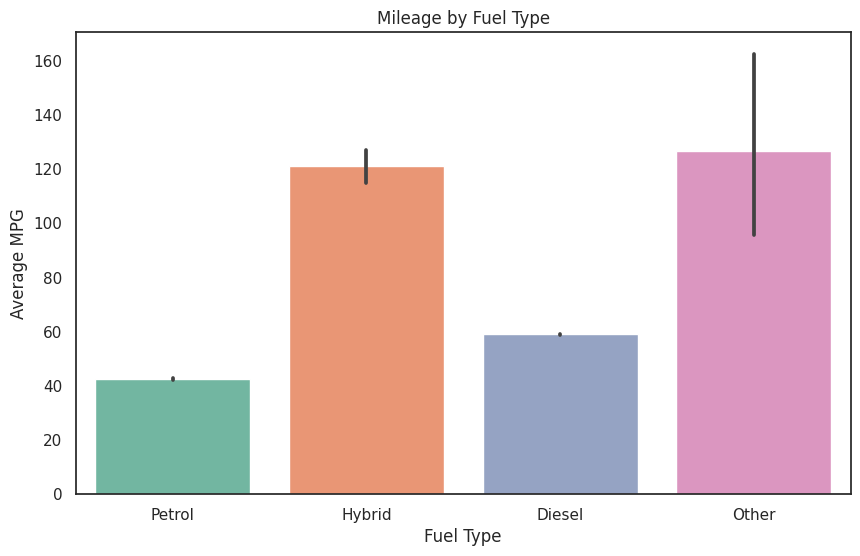

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='fuelType', y='mpg')
plt.title('Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average MPG')
plt.show()


 How does the tax rate affect the distribution of Mercedes car prices?

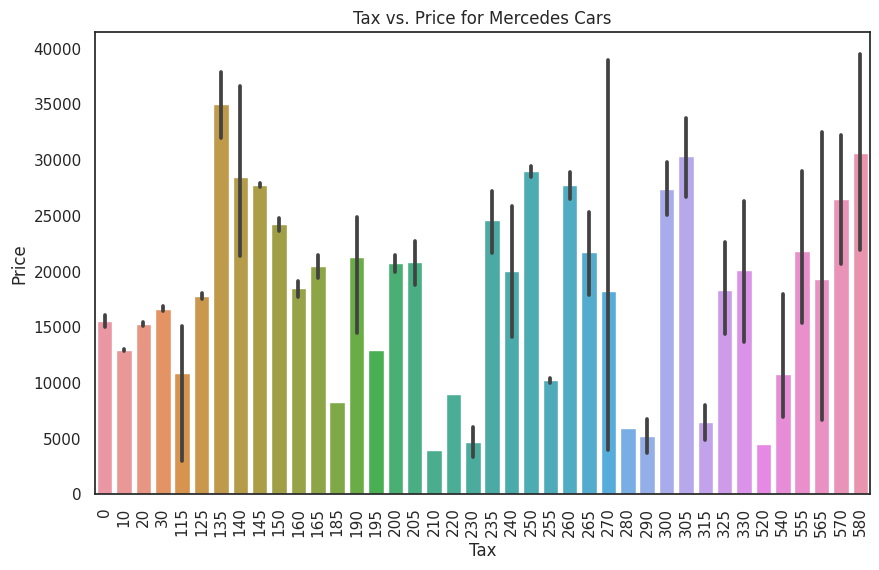

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='tax', y='price', data=df)
plt.title('Tax vs. Price for Mercedes Cars')
plt.xlabel('Tax')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()


<a id = '10'></a><br>
# **Model Selection**

We tried the algoritms to our data. Now the thing we must do is getting better by making eleminations by the helping of backward elemination.

## **The best model for us is Random forest .**

In [216]:
df.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [ ]:
import statsmodels.api as sm
x = np.append(arr=np.ones((12988,1)).astype(int), values = x, axis = 1)
x_opt = x[:, [0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     6492.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:25:44   Log-Likelihood:            -1.2974e+05
No. Observations:               12988   AIC:                         2.595e+05
Df Residuals:                   12982   BIC:                         2.595e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.08e+06   6.32e+04    -64.550      0.000    -4.2e+06   -3.96e+06
x1          2030.3729     31.288     64.892      0.000    1969.043    2091.703
x2            -0.1276      0.003    -38.269      0.000      -0.134      -0.121
x3            -3.1236      0.864     -3.616      0.000      -4.817      -1.430
x4          -125.7980      3.688    -34.106      0.000    -133.028    -118.568
x5          8964.5823     95.973     93.408      0.000    8776.462    9152.703
==============================================================================
Omnibus:                     6602.150   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225323.544
Skew:                           1.817   Prob(JB):                         0.00
Kurtosis:                      23.079   Cond. No.                     4.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **As you see in P>|t| there is no need to make elemination.**

<a id = '10'></a><br>
# **Conclusion**

As a conclusion, we checked, prapered and visualized the data first. Then, we tried the models for the data. With respect to R squere score we choose best model. Finally, elimation of columns that spoil data, We cant make it better further because P>|t|. Thank you

Project completed by:
**Jinsar Ahmed 20SW116 (GL)**
**Abdul Rafay  20SW064**
**M.Taha       20SW102**  